In [1]:
%pip install torchgeo pystac_client planetary_computer
%pip install usda rioxarray rasterstats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.5/292.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.4/653.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import usda.utils as usda_utils
import usda.geodata_process as usda_geodataProces

In [3]:
import os
import geopandas as gpd
from torchgeo.datasets.utils import download_url
from IPython.display import Image
import pystac_client
import planetary_computer
from shapely.geometry import shape
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
__C=usda_utils.AttrDict()
args=__C

__C.workspace='/content/gdrive/MyDrive/dataset/naip_cook'

__C.data=usda_utils.AttrDict()
__C.data.naip_cook_entityID=os.path.join(args.workspace,'naip_64c86d1059982c8e/naip_64c86d1059982c8e.shp')
__C.data.cook_border=os.path.join(args.workspace,'Cook_County_Border.geojson')
__C.data.chicago_boundary=os.path.join(args.workspace,'Boundaries - City.geojson')
__C.data.naip_dir=os.path.join(args.workspace,'imgs')
__C.data.items_info_fn=os.path.join(args.workspace,'items_info.geojson')

In [6]:
cookcounty_border=gpd.read_file(args.data.cook_border)
cookcounty_border_envelope=cookcounty_border.envelope
cookcounty_border_envelope

0    POLYGON ((-88.26365 41.46971, -87.52414 41.469...
dtype: geometry

In [7]:
AOI_json=cookcounty_border_envelope.geometry.to_json()
AOI_json

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {}, "geometry": {"type": "Polygon", "coordinates": [[[-88.26365102252663, 41.469712978017064], [-87.52414271436139, 41.469712978017064], [-87.52414271436139, 42.15430113371412], [-88.26365102252663, 42.15430113371412], [-88.26365102252663, 41.469712978017064]]]}, "bbox": [-88.26365102252663, 41.469712978017064, -87.52414271436139, 42.15430113371412]}], "bbox": [-88.26365102252663, 41.469712978017064, -87.52414271436139, 42.15430113371412]}'

In [8]:
AOI=eval(AOI_json)['features'][0]['geometry']
AOI

{'type': 'Polygon',
 'coordinates': [[[-88.26365102252663, 41.469712978017064],
   [-87.52414271436139, 41.469712978017064],
   [-87.52414271436139, 42.15430113371412],
   [-88.26365102252663, 42.15430113371412],
   [-88.26365102252663, 41.469712978017064]]]}

In [9]:
data_range="2021-01-01/2022-01-01"

catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
     modifier=planetary_computer.sign_inplace,
     )

catalog

<Client id=microsoft-pc>

In [ ]:
search_results= catalog.search(collections=["naip"], intersects=AOI, datetime=data_range)
items=search_results.item_collection()
items

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
items[0]

<Item id=il_m_4208864_sw_16_060_20210928>

In [ ]:
item_polygon=shape(items[0].geometry)
item_polygon_gdf=gpd.GeoDataFrame({'geometry':[item_polygon]},crs=4326)
item_polygon_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
items_gdf=usda_geodataProces.planetary_computer_items_filter4download(items,border=cookcounty_border.geometry[0])
items_gdf=usda_geodataProces.drop_overlapping_polygons(items_gdf)

100%|██████████| 98/98 [00:00<00:00, 347.48it/s]


In [ ]:
items_gdf.head(1)

,idx,id,datetime,url,geometry
0,0,il_m_4208864_sw_16_060_20210928,2021-09-28T16:00:00Z,https://naipeuwest.blob.core.windows.net/naip/...,"POLYGON ((-88.05728 41.99734, -88.05842 42.066..."


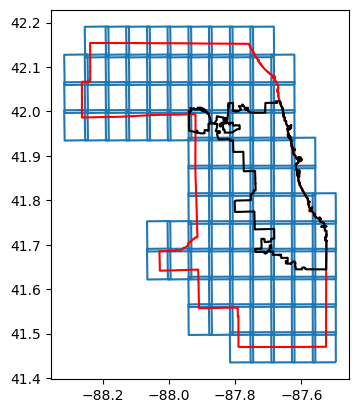

In [ ]:
chicago_boundary_gdf=gpd.read_file(args.data.chicago_boundary)

ax=items_gdf.boundary.plot()
cookcounty_border.boundary.plot(color='red',ax=ax)
chicago_boundary_gdf.boundary.plot(color='k',ax=ax);

In [ ]:
items_gdf.to_file(args.data.items_info_fn)

In [10]:
items_gdf=gpd.read_file(args.data.items_info_fn)
items_gdf.tail(2)

,idx,id,datetime,url,geometry
96,143,il_m_4208749_sw_16_060_20210905,2021-09-05 16:00:00+00:00,https://naipeuwest.blob.core.windows.net/naip/...,"POLYGON ((-87.93239 42.12233, -87.93340 42.191..."
97,144,il_m_4208749_se_16_060_20210905,2021-09-05 16:00:00+00:00,https://naipeuwest.blob.core.windows.net/naip/...,"POLYGON ((-87.87046 42.12233, -87.87141 42.191..."


In [13]:
downloaded_info={}
for idx,row in items_gdf[80:].iterrows():
    url=row.url
    try:
        print(f'downloading {idx}/{len(items_gdf)}')
        download_url(url,args.data.naip_dir)
        downloaded_info[idx]=[1,url]
    except:
        downloaded_info[idx]=[0,url]

downloading 80/98


100%|██████████| 487850036/487850036 [00:49<00:00, 9937430.48it/s]


downloading 81/98


100%|██████████| 477458180/477458180 [00:48<00:00, 9832219.29it/s] 


downloading 82/98


100%|██████████| 476753581/476753581 [00:50<00:00, 9515306.76it/s]


downloading 83/98


100%|██████████| 478017302/478017302 [00:51<00:00, 9368622.96it/s]


downloading 84/98


100%|██████████| 497811545/497811545 [00:49<00:00, 10114945.27it/s]


downloading 85/98


100%|██████████| 489259932/489259932 [00:46<00:00, 10557070.88it/s]


downloading 86/98


100%|██████████| 492171555/492171555 [00:52<00:00, 9313031.39it/s]


downloading 87/98


100%|██████████| 488246520/488246520 [00:49<00:00, 9915893.31it/s] 


downloading 88/98


100%|██████████| 479506000/479506000 [00:53<00:00, 8926555.29it/s] 


downloading 89/98


100%|██████████| 495895333/495895333 [00:48<00:00, 10285042.53it/s]


downloading 90/98


100%|██████████| 489030543/489030543 [00:43<00:00, 11213738.42it/s]


downloading 91/98


100%|██████████| 500237260/500237260 [00:53<00:00, 9340247.66it/s]


downloading 92/98


100%|██████████| 482584200/482584200 [00:47<00:00, 10220247.60it/s]


downloading 93/98


100%|██████████| 439336034/439336034 [00:39<00:00, 11229456.31it/s]


downloading 94/98


100%|██████████| 503081702/503081702 [00:50<00:00, 10003062.56it/s]


downloading 95/98


100%|██████████| 473044334/473044334 [00:47<00:00, 9933089.23it/s] 


downloading 96/98


100%|██████████| 501415765/501415765 [00:50<00:00, 9964661.88it/s] 


downloading 97/98


100%|██████████| 487738400/487738400 [00:43<00:00, 11185535.55it/s]
